In [20]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config.py import password

# connect to postgres database
engine = create_engine('postgresql://postgres:' + password + '@localhost:5432/Employee_DB')
connection = engine.connect()

In [35]:
# query the database and output as dataframe
salaries = pd.read_sql_query(
'''SELECT salary
FROM Salaries'''
, connection)

In [63]:
# set default figure size
plt.rcParams["figure.figsize"] = (10,10)

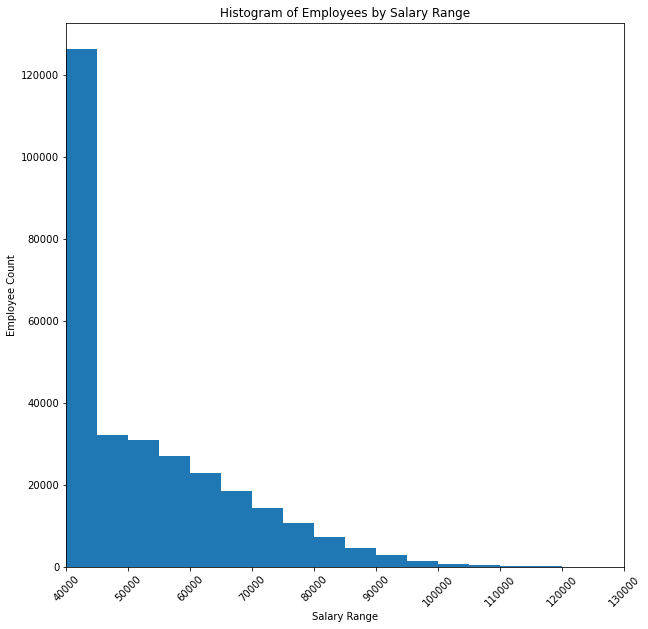

In [64]:
# create bin sizes for histogram
bins = [x for x in range(40000,135000,5000)]

# plot histogram with axis labels
plt.hist(salaries, bins)
plt.xlabel("Salary Range")
plt.ylabel("Employee Count")
plt.title("Histogram of Employees by Salary Range")
plt.xlim([40000,130000])
plt.xticks(rotation=45)
plt.savefig("Salary_Histogram.png")
plt.show()

In [ ]:
salary_x_title = pd.read_sql_query(
'''SELECT salary
FROM Salaries'''
, connection)